In [6]:
import datetime
import os
import warnings

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pygrib

from cartopy.feature.nightshade import Nightshade

%matplotlib inline

In [9]:
# loading GRIB dataset (Northern hemisphere for 01-01-2022);
filename = 'GRIBNOA00.000.1'
grib_file = os.path.join('..', 'source_data', filename)
grib_data = pygrib.open(grib_file)
grib = grib_data.select()[0]

In [10]:
mean_sea_level_pressure = grib_data.select()[0]
pressure_data = mean_sea_level_pressure.values

temperature = grib_data.select()[34]
temperature_data = temperature.values

In [11]:
lons = np.linspace(float(grib['longitudeOfFirstGridPointInDegrees']),
                   float(grib['longitudeOfLastGridPointInDegrees']), int(grib['Ni']))
lats = np.linspace(float(grib['latitudeOfFirstGridPointInDegrees']),
                   float(grib['latitudeOfLastGridPointInDegrees']), int(grib['Nj']))

grid_lons, grid_lats = np.meshgrid(lons, lats)

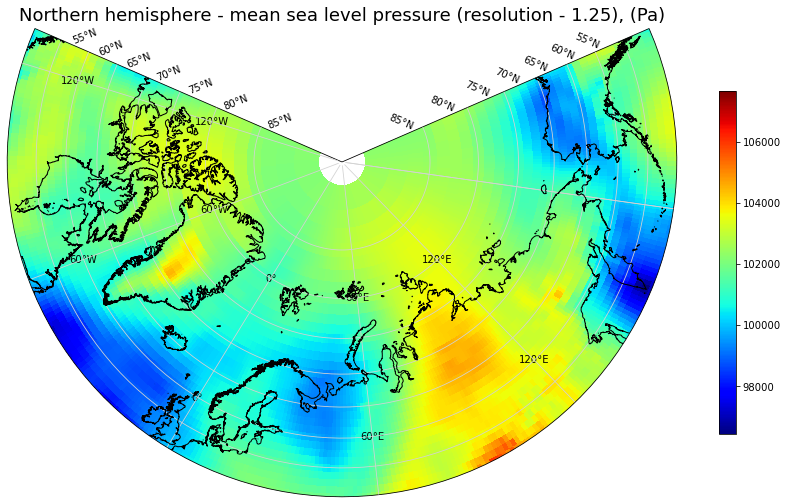

In [13]:
figure = plt.figure(figsize=(15, 21))

# ***** Pressure at sea level ************** #

projection = ccrs.LambertConformal(cutoff=50, central_longitude=50.0)
ax_1 = figure.add_subplot(1, 1, 1, projection=projection)
ax_1.set_global()
ax_1.coastlines(resolution='10m', zorder=10)
ax_1.gridlines(draw_labels=True, color='lightgray', zorder=5)
cs_1 = ax_1.pcolormesh(grid_lons, grid_lats, pressure_data, cmap=plt.cm.jet, zorder=1, transform=ccrs.PlateCarree())
ax_1.set_title('Northern hemisphere - mean sea level pressure (resolution - 1.25), (Pa)', fontsize=18)

plt.colorbar(cs_1, ax=ax_1, orientation='vertical', shrink=0.3)
plt.subplots_adjust(hspace=0.3)
plt.show()

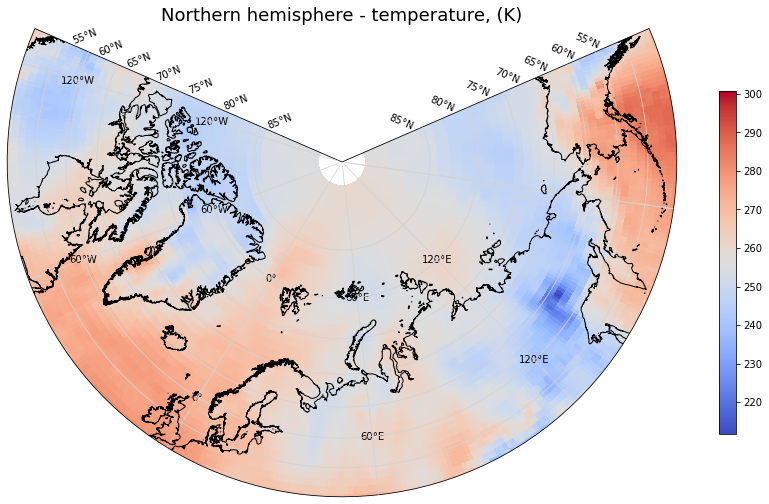

In [14]:
figure = plt.figure(figsize=(15, 21))

# ***** Pressure at sea level ************** #

projection = ccrs.LambertConformal(cutoff=50, central_longitude=50.0)
ax_1 = figure.add_subplot(1, 1, 1, projection=projection)
ax_1.set_global()
ax_1.coastlines(resolution='10m', zorder=10)
ax_1.gridlines(draw_labels=True, color='lightgray', zorder=5)
cs_1 = ax_1.pcolormesh(grid_lons, grid_lats, temperature_data, cmap=plt.cm.coolwarm, zorder=1, transform=ccrs.PlateCarree())
ax_1.set_title('Northern hemisphere - temperature, (K)', fontsize=18)

plt.colorbar(cs_1, ax=ax_1, orientation='vertical', shrink=0.3)
plt.subplots_adjust(hspace=0.3)
plt.show()

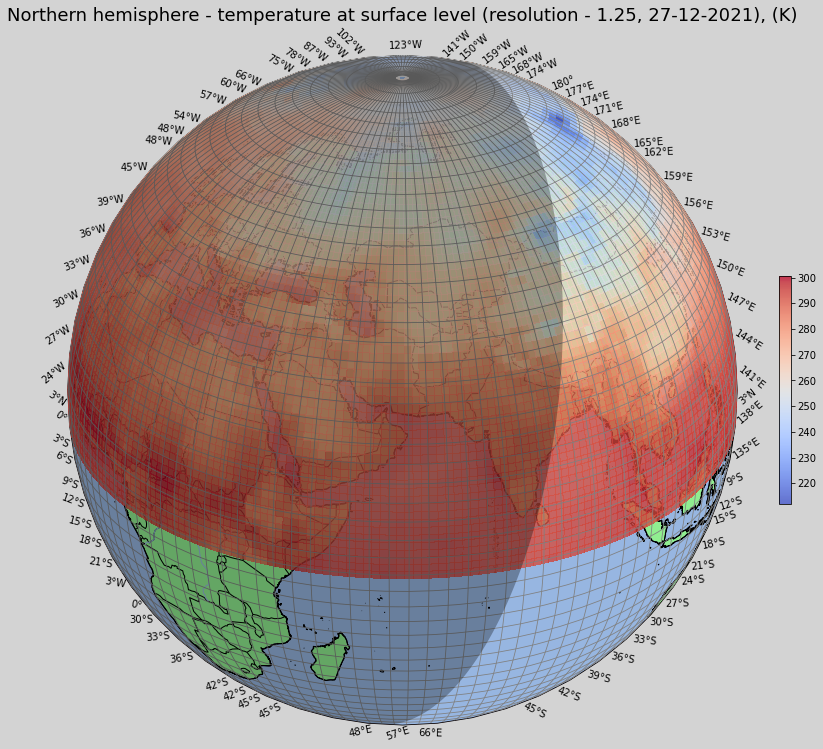

In [102]:
figure = plt.figure(figsize=(15, 21))
figure.patch.set_facecolor('lightgray')

# ***** Pressure at sea level ************** #

projection = ccrs.NearsidePerspective(central_longitude=59.0, central_latitude=29.0)
date = datetime.datetime(2022, 2, 1, 1)

ax = figure.add_subplot(1, 1, 1, projection=projection)
ax.set_global()
ax.coastlines(resolution='10m', zorder=2)
ax.set_title('Northern hemisphere - pressure at sea level (27-12-2021), (K)', fontsize=18)
ax.add_feature(cfeature.LAND, zorder=1, color='lightgreen')
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.COASTLINE, zorder=1)
ax.add_feature(cfeature.BORDERS, zorder=1)
ax.add_feature(cfeature.RIVERS, zorder=1)
ax.add_feature(Nightshade(date, alpha=0.3), zorder=15)

cs = ax.pcolormesh(grid_lons, grid_lats, temperature_data, cmap=plt.cm.coolwarm, zorder=5, alpha=0.8,
                       transform=ccrs.PlateCarree())

gridlines = ax.gridlines(draw_labels=True, color='gray', dms=True, zorder=10)
gridlines.xlocator = mticker.FixedLocator(range(-180, 180, 3))
gridlines.ylocator = mticker.FixedLocator(range(-180, 180, 3))

ax.set_facecolor((1.0, 0.47, 0.42))

plt.colorbar(cs, ax=ax, orientation='vertical', shrink=0.2)
plt.subplots_adjust(hspace=0.3)
plt.show()